In [201]:
import pandas as pd
import numpy as np

In [ ]:
https://electionlab.mit.edu/data#data

In [83]:
df2 = pd.read_csv('1976-2016-house.csv')

In [86]:
df2['year'].unique()

array([1990, 2016, 2006, 1984, 1986, 2002, 1992, 1998, 1976, 1996, 2012,
       2010, 1980, 1982, 1978, 2008, 2000, 1988, 2004, 2014, 1994])

In [104]:
df2_year = df2.loc[df2['year']>=2016]

In [260]:
df2_year.shape

(1441, 16)

In [983]:
df2_year.loc[df2_year['state']=='Wyoming'];

In [318]:
df2_year.loc[df2_year['candidate']=='Ryan Greene', 'party'] ='democrat'
# df.loc[df['column_name'] == some_value]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [323]:
df2_year.loc[df2_year['candidate']=='Liz Cheney', 'party'] ='republican'

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [338]:
df2_party_rep = df2_year.loc[df2_year['party']=='republican']

In [984]:
df2_party_rep.tail();

In [343]:
df2_party_dem = df2_year.loc[df2_year['party']=='democrat']

In [985]:
df2_party_dem.tail();

In [303]:
len(df2_party_dem)

421

In [376]:
len(df2_party_rep)

420

In [982]:
df2_concat = pd.concat([df2_party_dem, df2_party_rep])
df2_concat.sort_values(['state','district']);

In [346]:
df2_concat = df2_concat.drop(['state_fips', 'state_cen', 'state_ic', 'office', 'stage', 'special', 'candidate', 'writein', 'version', 'totalvotes', 'year'], axis=1)

In [934]:
df2_sort = df2_concat.sort_values(['state','district'])

In [986]:
df2_sort.head();

In [936]:
df2_sort['totalvotes'] = df2_sort.groupby(['state', 'district']).candidatevotes.transform('sum')
# df['Data4'] = df['Data3'].groupby(df['Date']).transform('sum')

In [937]:
df2_sort['candidatevotes_combined'] = df2_sort.groupby(['state','district','party']).candidatevotes.transform('sum')

In [938]:
df2_sort = df2_sort[['state','district','party','candidatevotes_combined','totalvotes']].drop_duplicates()

In [939]:
df2_sort['per_vote'] = np.round(np.where(df2_sort['candidatevotes_combined'] > 0, df2_sort['candidatevotes_combined']/df2_sort['totalvotes'], 0), 4)
df2_sort

,state,district,party,candidatevotes_combined,totalvotes,per_vote
358,Alabama,1,republican,208083,208083,1.0000
174,Alabama,2,democrat,112089,246975,0.4538
497,Alabama,2,republican,134886,246975,0.5462
463,Alabama,3,democrat,94549,286713,0.3298
425,Alabama,3,republican,192164,286713,0.6702
351,Alabama,4,republican,235925,235925,1.0000
352,Alabama,5,democrat,102234,307881,0.3321
278,Alabama,5,republican,205647,307881,0.6679
265,Alabama,6,democrat,83709,329022,0.2544
281,Alabama,6,republican,245313,329022,0.7456


In [377]:
len(df2_sort['totalvotes'].unique())

435

In [940]:
df2_sort['congdist'] = df2_sort['state'].map(str) + df2_sort['district'].astype(str)
# dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]

In [821]:
len(df2_sort)

808

In [987]:
df2_sort.head();

In [953]:
df2_final = df2_sort.drop(['candidatevotes_combined','totalvotes'], axis=1)

In [994]:
df2_final.head()

,state,district,party,per_vote,congdist
358,Alabama,1,republican,1.0000,Alabama1
174,Alabama,2,democrat,0.4538,Alabama2
497,Alabama,2,republican,0.5462,Alabama2
463,Alabama,3,democrat,0.3298,Alabama3
425,Alabama,3,republican,0.6702,Alabama3


In [1082]:
# dem_vote = df2_final['dem_vote'] = np.where(df2_final['party'] == 'democrat', df2_final['per_vote'], 0)

In [1033]:
# rep_vote = df2_final['rep_vote'] = np.where(df2_final['party'] == 'republican', df2_final['per_vote'], 0)

In [1065]:
df2_final['rep_vote']= np.where((df2_final['party'] == 'democrat') & (df2_final['rep_vote'] == 0) & df2_final['dem_vote'] != 0, 1 - df2_final['dem_vote'],rep_vote)

In [1066]:
df2_final['dem_vote']= np.where((df2_final['party'] == 'republican') & (df2_final['dem_vote'] == 0) & df2_final['rep_vote'] != 0, 1 - df2_final['rep_vote'],dem_vote)

In [1068]:
df2_final['dem_vote'] = df2_final['dem_vote'].round(4)

In [1070]:
df2_final['rep_vote'] = df2_final['rep_vote'].round(4)

In [1074]:
# df2_final.head()

In [1075]:
df2_final = df2_final[['state','district','congdist','dem_vote','rep_vote']].drop_duplicates().reset_index().drop(columns = 'index')
df2_final
# df2_sort = df2_sort[['state','district','party','candidatevotes_combined','totalvotes']].drop_duplicates()

,state,district,congdist,dem_vote,rep_vote
0,Alabama,1,Alabama1,0.0000,1.0000
1,Alabama,2,Alabama2,0.4538,0.5462
2,Alabama,3,Alabama3,0.3298,0.6702
3,Alabama,4,Alabama4,0.0000,1.0000
4,Alabama,5,Alabama5,0.3321,0.6679
5,Alabama,6,Alabama6,0.2544,0.7456
6,Alabama,7,Alabama7,1.0000,0.0000
7,Alaska,0,Alaska0,0.4172,0.5828
8,Arizona,1,Arizona1,0.5388,0.4612
9,Arizona,2,Arizona2,0.4304,0.5696


In [1076]:
# df2_test.iloc[4] == df2_test.iloc[5]

In [1057]:
print(df2_test.iloc[4].dem_vote)
print(df2_test.iloc[5].dem_vote)



0.3321
0.33209999999999995


## indepedent vars

### sex percentage

In [ ]:
https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t

In [152]:
df3 = pd.read_csv('ACS_16_1YR_S0101_with_ann.csv')

In [989]:
df3.tail();

In [378]:
df3.shape

(438, 219)

In [625]:
drop_first = df3.drop(0)
# drop_first['GEO.display-label'].str.split(' ',0)[8][2]

In [626]:
d_f = drop_first['GEO.display-label'][:-1]

In [697]:
d_f[1]

'Congressional District 1 (115th Congress), Alabama'

In [565]:
type(d_f)

pandas.core.series.Series

In [679]:
d_f.str.split(' ',0)[2]

['Congressional', 'District', '2', '(115th', 'Congress),', 'Alabama']

In [421]:
name_dist_state+name_dist_num

' Alabama1'

In [746]:
list(drop_first['GEO.display-label'])[-1]

'Resident Commissioner District (at Large) (115th Congress), Puerto Rico'

In [990]:
def state_num():
    split_list = []
    for x in d_f:
        s = x.split(' ')[2]
        if s == '(at':
            s = '0'
        else:
            s         
        split_list.append(s)
        
    name_list = []
    for y in d_f:
        n = y.split(', ')[1]
        name_list.append(n)
        
    zip_list = list(zip(name_list, split_list))
        
    final_list = []
    for a,b in zip_list:
        final_list.append("".join((a,b)))
    
    return final_list
    
state_num();


In [743]:
len(state_num())

436

In [991]:
total_pop = df3['HC01_EST_VC01'][1:-1].astype(int)
total_pop.head();

In [762]:
male_pop = df3['HC02_EST_VC01'][1:-1].astype(int)

In [763]:
female_pop = df3['HC03_EST_VC01'][1:-1].astype(int)

In [970]:
pop_list = list(zip(state_num(), total_pop, male_pop, female_pop, round(male_pop/total_pop,4), round(female_pop/total_pop,4)))

In [971]:
df_pop = pd.DataFrame(pop_list, columns=['congdist','totalpop','malepop','femalepop','malepopper','femalepopper'])

In [972]:
df_s_and_p = df_pop.drop(['totalpop', 'malepop', 'femalepop'], axis=1)

In [992]:
df_s_and_p.head();

In [1077]:
df_state_and_pop = pd.merge(df2_final, df_s_and_p, on=['congdist'], how='inner')
# pd.merge(bas_sort, bp_sort, on=[0], how='inner')

In [1080]:
df_state_and_pop.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074


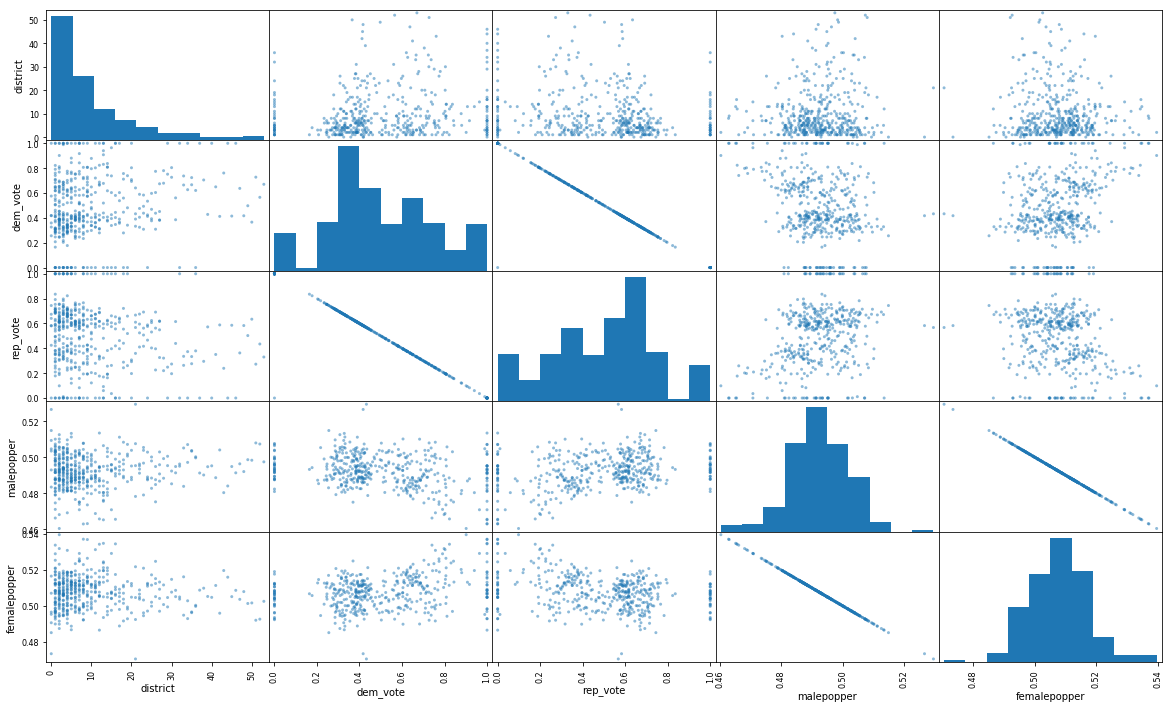

In [1081]:
pd.plotting.scatter_matrix(df_state_and_pop, figsize=[20,12]);

### median age

In [1134]:
df4 = pd.read_csv('ACS_16_1YR_B01002_with_ann.csv')

In [1135]:
df4.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,HD02_VD04
0,Id,Id2,Geography,Estimate; Median age -- - Total:,Margin of Error; Median age -- - Total:,Estimate; Median age -- - Male,Margin of Error; Median age -- - Male,Estimate; Median age -- - Female,Margin of Error; Median age -- - Female
1,5001500US0101,0101,"Congressional District 1 (115th Congress), Ala...",39.6,0.4,38.3,0.6,41.0,0.7
2,5001500US0102,0102,"Congressional District 2 (115th Congress), Ala...",38.2,0.6,36.7,0.6,40.1,0.6
3,5001500US0103,0103,"Congressional District 3 (115th Congress), Ala...",38.3,0.5,36.6,0.6,39.8,0.7
4,5001500US0104,0104,"Congressional District 4 (115th Congress), Ala...",40.7,0.4,39.7,0.7,42.0,0.7


In [1145]:
median_age = df4['HD01_VD02'][1:-1]

In [1149]:
age_list = list(zip(state_num(), median_age))

In [1151]:
df_al = pd.DataFrame(age_list, columns=['congdist','avg_age'])

In [1152]:
df_final2 = pd.merge(df_state_and_pop, df_al, on=['congdist'], how='inner')

In [1154]:
df_final2.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1


In [1165]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 8 columns):
state           435 non-null object
district        435 non-null int64
congdist        435 non-null object
dem_vote        435 non-null float64
rep_vote        435 non-null float64
malepopper      435 non-null float64
femalepopper    435 non-null float64
avg_age         435 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 30.6+ KB


### Ethnicity

In [1155]:
df5 = pd.read_csv('ACS_16_5YR_DP05_with_ann.csv')

In [1157]:
len(df5)

438

In [1181]:
df5.iloc[:,265:280].head()

,HC03_VC88,HC04_VC88,HC01_VC89,HC02_VC89,HC03_VC89,HC04_VC89,HC01_VC90,HC02_VC90,HC03_VC90,HC04_VC90,HC01_VC91,HC02_VC91,HC03_VC91,HC04_VC91,HC01_VC92
0,Percent; HISPANIC OR LATINO AND RACE - Total p...,Percent Margin of Error; HISPANIC OR LATINO AN...,Estimate; HISPANIC OR LATINO AND RACE - Total ...,Margin of Error; HISPANIC OR LATINO AND RACE -...,Percent; HISPANIC OR LATINO AND RACE - Total p...,Percent Margin of Error; HISPANIC OR LATINO AN...,Estimate; HISPANIC OR LATINO AND RACE - Total ...,Margin of Error; HISPANIC OR LATINO AND RACE -...,Percent; HISPANIC OR LATINO AND RACE - Total p...,Percent Margin of Error; HISPANIC OR LATINO AN...,Estimate; HISPANIC OR LATINO AND RACE - Total ...,Margin of Error; HISPANIC OR LATINO AND RACE -...,Percent; HISPANIC OR LATINO AND RACE - Total p...,Percent Margin of Error; HISPANIC OR LATINO AN...,Estimate; HISPANIC OR LATINO AND RACE - Total ...
1,3.0,0.1,10847,1002,1.6,0.1,2559,733,0.4,0.1,1030,404,0.1,0.1,6393
2,3.5,0.1,14755,800,2.2,0.1,2788,459,0.4,0.1,944,264,0.1,0.1,5374
3,2.9,0.1,10905,957,1.6,0.1,3265,834,0.5,0.1,451,183,0.1,0.1,5700
4,6.2,0.1,26609,1770,3.9,0.3,1311,378,0.2,0.1,1021,537,0.1,0.1,13380


In [1214]:
white_per = df5['HC03_VC49'][1:-1].astype(float)

In [1215]:
black_per = df5['HC03_VC50'][1:-1].astype(float)

In [1216]:
asian_per = df5['HC03_VC56'][1:-1].astype(float)

In [1217]:
hisp_lat_per = df5['HC03_VC88'][1:-1].astype(float)

In [1220]:
ethnicity_per = list(zip(state_num(), white_per.div(100).round(4), black_per.div(100).round(4), asian_per.div(100).round(4), hisp_lat_per.div(100).round(4)))

In [1221]:
df_ep = pd.DataFrame(ethnicity_per, columns=['congdist','white_per','black_per','asian_per','latino_per'])

In [1223]:
df_final3 = pd.merge(df_final2, df_ep, on=['congdist'], how='inner')

In [1225]:
df_final3.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,asian_per,latino_per
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,0.014,0.030
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,0.011,0.035
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,0.016,0.029
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,0.006,0.062
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,0.016,0.049


### urban/rural

In [1226]:
df6 = pd.read_csv('DEC_10_115_P2_with_ann.csv')

In [1227]:
df6.head()

,GEO.id,GEO.id2,GEO.display-label,D001,D002,D003,D004,D005,D006
0,Id,Id2,Geography,Total:,Urban:,Urban: - Inside urbanized areas,Urban: - Inside urban clusters,Rural,Not defined for this file
1,5001500US0101,0101,"Congressional District 1 (115th Congress), Ala...",682820,456228,389832,66396,226592,0
2,5001500US0102,0102,"Congressional District 2 (115th Congress), Ala...",682820,373585,259770,113815,309235,0
3,5001500US0103,0103,"Congressional District 3 (115th Congress), Ala...",682819,343078,248414,94664,339741,0
4,5001500US0104,0104,"Congressional District 4 (115th Congress), Ala...",682819,236405,122567,113838,446414,0


In [1259]:
ur_drop = df6['GEO.display-label'][1:-1]

In [1260]:
ur_drop.str.split(' ')[2]

['Congressional', 'District', '2', '(115th', 'Congress),', 'Alabama']

In [1246]:
ur_drop.str.split(', ')[2][1]

'Alabama'

In [1262]:
def urban_congdist():
    split_list = []
    for x in ur_drop:
        s = x.split(' ')[2]
        if s == '(at':
            s = '0'
        else:
            s         
        split_list.append(s)
        
    name_list = []
    for y in ur_drop:
        n = y.split(', ')[1]
        name_list.append(n)
        
    zip_list = list(zip(name_list, split_list))
        
    final_list = []
    for a,b in zip_list:
        final_list.append("".join((a,b)))
    
    return final_list
    
urban_congdist();

In [1269]:
urban_list = df6['D002'][1:-1].astype(int)

In [1271]:
rural_list = df6['D005'][1:-1].astype(int)

In [1285]:
 ur_per = list(zip(urban_congdist(), urban_list, rural_list))

In [1299]:
df_ur = pd.DataFrame(ur_per, columns=['congdist','urbanpop','ruralpop'])

In [1300]:
df_ur['totalpop'] = df_ur.sum(axis=1)
# dem_vote = df2_final['dem_vote'] = np.where(df2_final['party'] == 'democrat', df2_final['per_vote'], 0)

In [1301]:
df_ur.head()

,congdist,urbanpop,ruralpop,totalpop
0,Alabama1,456228,226592,682820
1,Alabama2,373585,309235,682820
2,Alabama3,343078,339741,682819
3,Alabama4,236405,446414,682819
4,Alabama5,447466,235353,682819


In [1302]:
df_ur['urban_per'] = round(df_ur['urbanpop']/df_ur['totalpop'],4)

In [1303]:
df_ur['rural_per'] = round(df_ur['ruralpop']/df_ur['totalpop'],4)

In [1304]:
df_ur = df_ur.drop(['urbanpop','ruralpop','totalpop'], axis=1);

In [1306]:
df_ur.head()

,congdist,urban_per,rural_per
0,Alabama1,0.6682,0.3318
1,Alabama2,0.5471,0.4529
2,Alabama3,0.5024,0.4976
3,Alabama4,0.3462,0.6538
4,Alabama5,0.6553,0.3447


In [1307]:
df_final4 = pd.merge(df_final3, df_ur, on=['congdist'], how='inner')

In [1311]:
df_final4.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,rural_per
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,0.014,0.030,0.6682,0.3318
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.4529
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.4976
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,0.006,0.062,0.3462,0.6538
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.3447


# adding in D/R column

In [1312]:
df_final4['D/R'] = np.where((df_final4['dem_vote']>.5),0,1)
# 0 = democrat  1 = republican

In [1314]:
df_final4.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,rural_per,D/R
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,0.014,0.030,0.6682,0.3318,1
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.4529,1
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.4976,1
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,0.006,0.062,0.3462,0.6538,1
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.3447,1


In [1316]:
df_final4['D/R_scale'] = np.where((df_final4['D/R'] == 0), .5 - (df_final4['dem_vote']/2), .5 + df_final4['rep_vote']/2)

In [1432]:
df_final4.head(15)

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,rural_per,D/R,D/R_scale
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,0.014,0.030,0.6682,0.3318,1,1.00000
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.4529,1,0.77310
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.4976,1,0.83510
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,0.006,0.062,0.3462,0.6538,1,1.00000
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.3447,1,0.83395
5,Alabama,6,Alabama6,0.2544,0.7456,0.4830,0.5170,39.0,0.796,0.147,0.017,0.049,0.6917,0.3083,1,0.87280
6,Alabama,7,Alabama7,1.0000,0.0000,0.4708,0.5292,36.5,0.334,0.634,0.007,0.027,0.7216,0.2784,0,0.00000
7,Alaska,0,Alaska0,0.4172,0.5828,0.5265,0.4735,33.5,0.656,0.033,0.060,0.067,0.6602,0.3398,1,0.79140
8,Arizona,1,Arizona1,0.5388,0.4612,0.5037,0.4963,37.5,0.650,0.023,0.016,0.217,0.6206,0.3794,0,0.23060
9,Arizona,2,Arizona2,0.4304,0.5696,0.4882,0.5118,40.8,0.811,0.041,0.029,0.276,0.8918,0.1082,1,0.78480


### school

In [1319]:
df7 = pd.read_csv('ACS_16_1YR_B06009_with_ann.csv')

In [1430]:
len(df7)

437

In [1343]:
less_hs = df7['HD01_VD03'][1:-1].astype(int)

In [1344]:
hs = df7['HD01_VD04'][1:-1].astype(int)

In [1345]:
some_college = df7['HD01_VD05'][1:-1].astype(int)

In [1346]:
bach_degree = df7['HD01_VD06'][1:-1].astype(int)

In [1347]:
grad_degree = df7['HD01_VD07'][1:-1].astype(int)

In [1353]:
tot_school = df7['HD01_VD01'][1:-1].astype(int)

In [1354]:
school_per = list(zip(state_num(), less_hs, hs, some_college, bach_degree, grad_degree, tot_school))

In [1356]:
df_sp = pd.DataFrame(school_per, columns=['congdist', 'less_hs', 'hs', 'some_college', 'bach_degree', 'grad_degree', 'tot_school'])

In [1358]:
df_sp.head()

,congdist,less_hs,hs,some_college,bach_degree,grad_degree,tot_school
0,Alabama1,62465,158178,146731,73720,42534,483628
1,Alabama2,74628,148183,140230,64329,36840,464210
2,Alabama3,77255,144060,143277,64031,43454,472077
3,Alabama4,92610,157757,141552,51327,29094,472340
4,Alabama5,66565,137219,138047,90532,57866,490229


In [1362]:
df_sp['less_hs_per'] = round(df_sp['less_hs']/df_sp['tot_school'],4)

In [1363]:
df_sp['hs_per'] = round(df_sp['hs']/df_sp['tot_school'],4)

In [1364]:
df_sp['some_college_per'] = round(df_sp['some_college']/df_sp['tot_school'],4)

In [1365]:
df_sp['bach_degree_per'] = round(df_sp['bach_degree']/df_sp['tot_school'],4)

In [1366]:
df_sp['grad_degree_per'] = round(df_sp['grad_degree']/df_sp['tot_school'],4)

In [1367]:
df_sp.head()

,congdist,less_hs,hs,some_college,bach_degree,grad_degree,tot_school,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per
0,Alabama1,62465,158178,146731,73720,42534,483628,0.1292,0.3271,0.3034,0.1524,0.0879
1,Alabama2,74628,148183,140230,64329,36840,464210,0.1608,0.3192,0.3021,0.1386,0.0794
2,Alabama3,77255,144060,143277,64031,43454,472077,0.1636,0.3052,0.3035,0.1356,0.0920
3,Alabama4,92610,157757,141552,51327,29094,472340,0.1961,0.3340,0.2997,0.1087,0.0616
4,Alabama5,66565,137219,138047,90532,57866,490229,0.1358,0.2799,0.2816,0.1847,0.1180


In [1369]:
df_sp = df_sp.drop(['less_hs','hs','some_college','bach_degree','grad_degree','tot_school'], axis=1)

In [1370]:
df_sp.head()

,congdist,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per
0,Alabama1,0.1292,0.3271,0.3034,0.1524,0.0879
1,Alabama2,0.1608,0.3192,0.3021,0.1386,0.0794
2,Alabama3,0.1636,0.3052,0.3035,0.1356,0.0920
3,Alabama4,0.1961,0.3340,0.2997,0.1087,0.0616
4,Alabama5,0.1358,0.2799,0.2816,0.1847,0.1180


In [1433]:
df_final5 = pd.merge(df_final4, df_sp, on=['congdist'], how='left')

In [1435]:
len(df_final5)

435

### foreign citizens

In [1373]:
df8 = pd.read_csv('ACS_16_1YR_B05002_with_ann.csv')

In [1385]:
df8.iloc[:,25:45].head()

,HD01_VD12,HD02_VD12,HD01_VD13,HD02_VD13,HD01_VD14,HD02_VD14,HD01_VD15,HD02_VD15,HD01_VD16,HD02_VD16,HD01_VD17,HD02_VD17,HD01_VD18,HD02_VD18,HD01_VD19,HD02_VD19,HD01_VD20,HD02_VD20,HD01_VD21,HD02_VD21
0,Estimate; Native: - Born outside the United St...,Margin of Error; Native: - Born outside the Un...,Estimate; Foreign born:,Margin of Error; Foreign born:,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Not a U.S. citizen,Margin of Error; Foreign born: - Not a U.S. ci...
1,2996,1098,19001,3257,10369,2222,1505,543,4933,1568,632,704,66,111,2963,1240,270,257,8632,2286
2,7248,1657,17536,2028,6621,1366,1224,420,2701,935,323,236,0,195,2292,848,81,125,10915,1661
3,5803,1378,19700,2113,6841,1469,1208,443,3772,1041,0,195,59,102,1496,929,306,364,12859,1782
4,3829,1212,23357,2482,6998,1871,219,195,2431,807,332,376,0,195,3957,1474,59,99,16359,2175


In [1389]:
total_citizens = df8['HD01_VD01'][1:-1].astype(int)

In [1390]:
native_citizens = df8['HD01_VD02'][1:-1].astype(int)

In [1391]:
foreign_citizens = df8['HD01_VD13'][1:-1].astype(int)

In [1455]:
citizens_per = list(zip(state_num(), native_citizens, foreign_citizens, total_citizens))

In [1400]:
df_cp = pd.DataFrame(citizens_per, columns=['congdist', 'natcit', 'forcit', 'totcit'])

In [1401]:
df_cp.head()

,congdist,natcit,forcit,totcit
0,Alabama1,685456,19001,704457
1,Alabama2,664085,17536,681621
2,Alabama3,689782,19700,709482
3,Alabama4,659916,23357,683273
4,Alabama5,681561,30968,712529


In [1402]:
df_cp['foreign_per'] = round(df_cp['forcit']/df_cp['totcit'],4)

In [1403]:
df_cp['native_per'] = round(df_cp['natcit']/df_cp['totcit'],4)

In [1404]:
df_cp.head()

,congdist,natcit,forcit,totcit,foreign_per,native_per
0,Alabama1,685456,19001,704457,0.0270,0.9730
1,Alabama2,664085,17536,681621,0.0257,0.9743
2,Alabama3,689782,19700,709482,0.0278,0.9722
3,Alabama4,659916,23357,683273,0.0342,0.9658
4,Alabama5,681561,30968,712529,0.0435,0.9565


In [1406]:
df_cp = df_cp.drop(['totcit', 'natcit', 'forcit'], axis=1)

In [1407]:
df_cp.head()

,congdist,foreign_per,native_per
0,Alabama1,0.0270,0.9730
1,Alabama2,0.0257,0.9743
2,Alabama3,0.0278,0.9722
3,Alabama4,0.0342,0.9658
4,Alabama5,0.0435,0.9565


In [1436]:
df_final6 = pd.merge(df_final5, df_cp, on=['congdist'], how='left')

In [1437]:
len(df_final6)

435

### pop over 65

In [1411]:
df9 = pd.read_csv('ACS_16_1YR_S0103_with_ann.csv')

In [1438]:
len(df9)

432

In [1446]:
total_pop_65 = df9['HC01_EST_VC01'][1:].astype(int)

In [1447]:
vet_pop = df9['HC02_EST_VC01'][1:].astype(int)

In [1442]:
vet_drop = df9['GEO.display-label'][1:]

In [1452]:
def vet_congdist():
    split_list = []
    for x in vet_drop:
        s = x.split(' ')[2]
        if s == '(at':
            s = '0'
        else:
            s         
        split_list.append(s)
        
    name_list = []
    for y in vet_drop:
        n = y.split(', ')[1]
        name_list.append(n)
        
    zip_list = list(zip(name_list, split_list))
        
    final_list = []
    for a,b in zip_list:
        final_list.append("".join((a,b)))
    
    return final_list
    
vet_congdist();

In [1454]:
vets_per = list(zip(vet_congdist(), total_pop_65, vet_pop))

In [1497]:
df_vp = pd.DataFrame(vets_per, columns=['congdist','totalpop','vetpop'])

In [1498]:
df_vp.head()

,congdist,totalpop,vetpop
0,Alabama1,704457,120999
1,Alabama2,681621,109957
2,Alabama3,709482,109732
3,Alabama4,683273,121954
4,Alabama5,712529,112419


In [1499]:
df_vp['over_65_per'] = round(df_vp['vetpop']/df_vp['totalpop'],4)

In [1500]:
df_vp.head()

,congdist,totalpop,vetpop,over_65_per
0,Alabama1,704457,120999,0.1718
1,Alabama2,681621,109957,0.1613
2,Alabama3,709482,109732,0.1547
3,Alabama4,683273,121954,0.1785
4,Alabama5,712529,112419,0.1578


In [1501]:
df_vp = df_vp.drop(['totalpop', 'vetpop'], axis=1)

In [1502]:
df_vp.head()

,congdist,over_65_per
0,Alabama1,0.1718
1,Alabama2,0.1613
2,Alabama3,0.1547
3,Alabama4,0.1785
4,Alabama5,0.1578


In [1503]:
df_final7 = pd.merge(df_final6, df_vp, on=['congdist'], how='left')

In [1504]:
df_final7.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,...,D/R,D/R_scale,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,...,1,1.00000,0.1292,0.3271,0.3034,0.1524,0.0879,0.0270,0.9730,0.1718
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,...,1,0.77310,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,...,1,0.83510,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,...,1,1.00000,0.1961,0.3340,0.2997,0.1087,0.0616,0.0342,0.9658,0.1785
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,...,1,0.83395,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578


In [1505]:
df_final7.shape

(435, 24)

### food stamps

In [1472]:
df10 = pd.read_csv('ACS_17_1YR_B19058_with_ann.csv')

In [1473]:
df10.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03
0,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With cash public assistance...,Margin of Error; Total: - With cash public ass...,Estimate; Total: - No cash public assistance o...,Margin of Error; Total: - No cash public assis...
1,5001500US0101,0101,"Congressional District 1 (115th Congress), Ala...",262679,4254,35993,3194,226686,4826
2,5001500US0102,0102,"Congressional District 2 (115th Congress), Ala...",245124,4575,39365,2728,205759,4553
3,5001500US0103,0103,"Congressional District 3 (115th Congress), Ala...",274860,4733,38978,3620,235882,5457
4,5001500US0104,0104,"Congressional District 4 (115th Congress), Ala...",254061,4478,35922,2711,218139,4713


In [1483]:
total_houses = df10['HD01_VD01'][1:-1].astype(int)

In [1484]:
cash_asst = df10['HD01_VD02'][1:-1].astype(int)

In [1485]:
cash_per = list(zip(state_num(), total_houses, cash_asst))

In [1486]:
cash_per

[('Alabama1', 262679, 35993),
 ('Alabama2', 245124, 39365),
 ('Alabama3', 274860, 38978),
 ('Alabama4', 254061, 35922),
 ('Alabama5', 284883, 36652),
 ('Alabama6', 262296, 19251),
 ('Alabama7', 257762, 57632),
 ('Alaska0', 250741, 33454),
 ('Arizona1', 255285, 36395),
 ('Arizona2', 303440, 37566),
 ('Arizona3', 242271, 49786),
 ('Arizona4', 307261, 33592),
 ('Arizona5', 291062, 15522),
 ('Arizona6', 315622, 18280),
 ('Arizona7', 243861, 55572),
 ('Arizona8', 290198, 18254),
 ('Arizona9', 303972, 25410),
 ('Arkansas1', 283126, 43820),
 ('Arkansas2', 293697, 27804),
 ('Arkansas3', 301844, 28547),
 ('Arkansas4', 274415, 41826),
 ('California1', 282678, 33089),
 ('California2', 278942, 22208),
 ('California3', 251430, 30218),
 ('California4', 280226, 17627),
 ('California5', 265405, 21659),
 ('California6', 277502, 40783),
 ('California7', 263770, 24740),
 ('California8', 227852, 41391),
 ('California9', 236131, 32903),
 ('California10', 237723, 29897),
 ('California11', 267976, 21183),
 (

In [1487]:
df_cap = pd.DataFrame(cash_per, columns=['congdist', 'totalpop', 'cashpop'])

In [1489]:
df_cap.head()

,congdist,totalpop,cashpop
0,Alabama1,262679,35993
1,Alabama2,245124,39365
2,Alabama3,274860,38978
3,Alabama4,254061,35922
4,Alabama5,284883,36652


In [1491]:
df_cap['cash_asst_per'] = round(df_cap['cashpop']/df_cap['totalpop'],4)

In [1492]:
df_cap.head()

,congdist,totalpop,cashpop,cash_asst_per
0,Alabama1,262679,35993,0.1370
1,Alabama2,245124,39365,0.1606
2,Alabama3,274860,38978,0.1418
3,Alabama4,254061,35922,0.1414
4,Alabama5,284883,36652,0.1287


In [1493]:
df_cap = df_cap.drop(['totalpop', 'cashpop'], axis=1)

In [1494]:
df_cap.head()

,congdist,cash_asst_per
0,Alabama1,0.1370
1,Alabama2,0.1606
2,Alabama3,0.1418
3,Alabama4,0.1414
4,Alabama5,0.1287


In [1506]:
df_final8 = pd.merge(df_final7, df_cap, on=['congdist'], how='left')

In [1507]:
df_final8.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,...,D/R_scale,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,...,1.00000,0.1292,0.3271,0.3034,0.1524,0.0879,0.0270,0.9730,0.1718,0.1370
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,...,0.77310,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613,0.1606
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,...,0.83510,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547,0.1418
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,...,1.00000,0.1961,0.3340,0.2997,0.1087,0.0616,0.0342,0.9658,0.1785,0.1414
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,...,0.83395,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578,0.1287


# mubarak code

In [1510]:
marital_add= pd.read_csv('ACS_16_1YR_maritalstatus_with_ann.csv')
marriage_per= marital_add['HC02_EST_VC01'][1:-1].astype(float)
marriage_list= list(zip(state_num(), marriage_per.div(100).round(4)))
df_mp= pd.DataFrame(marriage_list, columns = ['congdist', 'marriage_per'])
df_final9= pd.merge(df_final8, df_mp, on= ['congdist'], how= 'left')

In [1511]:
df_final9.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,...,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,...,0.1292,0.3271,0.3034,0.1524,0.0879,0.0270,0.9730,0.1718,0.1370,0.454
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,...,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613,0.1606,0.494
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,...,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547,0.1418,0.516
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,...,0.1961,0.3340,0.2997,0.1087,0.0616,0.0342,0.9658,0.1785,0.1414,0.487
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,...,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578,0.1287,0.528


In [1512]:
employ_per = pd.read_csv('ACS_16_1YR_S2301_with_ann.csv')
employee_per = employ_per['HC03_EST_VC01'][1:-1].astype(float)
employee_per_list= list(zip(state_num(), employee_per.div(100).round(4)))
df_ep= pd.DataFrame(employee_per_list, columns = ['congdist', 'employee_per'])
df_final10= pd.merge(df_final9, df_ep, on= ['congdist'], how= 'left')

unemploy_per= employ_per['HC04_EST_VC01'][1:-1].astype(float)
unemployee_per_list= list(zip(state_num(), unemploy_per.div(100).round(4)))
df_uep= pd.DataFrame(unemployee_per_list, columns = ['congdist', 'unemployee_per'])
df_final11= pd.merge(df_final10, df_uep, on= ['congdist'], how= 'left')

In [1514]:
len(df_final11)

435

In [1515]:
median_income = pd.read_csv('ACS_16_1YR_medianincome_with_ann.csv')
med_income= median_income['HC02_EST_VC02'][1:-1]
median_income_list= list(zip(state_num(), med_income))
df_md_inc= pd.DataFrame(median_income_list, columns = ['congdist', 'median_income'])
df_final12= pd.merge(df_final11, df_md_inc, on= ['congdist'], how= 'left')

In [1517]:
len(df_final12)

435

In [1518]:
internet = pd.read_csv('ACS_16_1YR_internet_with_ann.csv')
internet_1= internet['HC05_EST_VC01'][1:-1].astype(float)
internet_2 = internet['HC07_EST_VC01'][1:-1].astype(float)
no_internet_total = sum([internet_1, internet_2])
no_internet_list= list(zip(state_num(), no_internet_total.div(100).round(4)))
df_no_int= pd.DataFrame(no_internet_list, columns = ['congdist', 'no_int_per'])
df_final13= pd.merge(df_final12,df_no_int, on= ['congdist'], how= 'left')

In [1520]:
len(df_final13)

435

In [1522]:
rent= pd.read_csv('ACS_16_1YR_renter_with_ann.csv')
rent1= rent['HD01_VD03'][1:-1].astype(float)
total_house= rent['HD01_VD01'][1:-1].astype(float)
per_rent= rent1/total_house
per_rent1 = np.round(per_rent,4)
rent_list= list(zip(state_num(), per_rent))
df_per_rent= pd.DataFrame(rent_list, columns = ['congdist', 'per_rent'])
df_final14= pd.merge(df_final13, df_per_rent, on= ['congdist'], how= 'left')

In [1526]:
df_final14.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,...,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,...,0.0270,0.9730,0.1718,0.1370,0.454,0.525,0.061,47083,0.171,0.318954
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,...,0.0257,0.9743,0.1613,0.1606,0.494,0.530,0.066,42035,0.186,0.348244
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,...,0.0278,0.9722,0.1547,0.1418,0.516,0.504,0.061,46544,0.176,0.304818
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,...,0.0342,0.9658,0.1785,0.1414,0.487,0.565,0.052,41110,0.197,0.254570
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,...,0.0435,0.9565,0.1578,0.1287,0.528,0.592,0.044,51690,0.141,0.293890


In [1551]:
df_final_drop = df_final14.drop(['state','district','congdist','dem_vote','rep_vote'], axis=1)
df_final_drop.iloc[:,0:20].head()

,malepopper,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,rural_per,D/R,D/R_scale,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per
0,0.4809,0.5191,39.6,0.674,0.277,0.014,0.030,0.6682,0.3318,1,1.00000,0.1292,0.3271,0.3034,0.1524,0.0879,0.0270,0.9730,0.1718,0.1370
1,0.4878,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.4529,1,0.77310,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613,0.1606
2,0.4861,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.4976,1,0.83510,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547,0.1418
3,0.4893,0.5107,40.7,0.881,0.070,0.006,0.062,0.3462,0.6538,1,1.00000,0.1961,0.3340,0.2997,0.1087,0.0616,0.0342,0.9658,0.1785,0.1414
4,0.4926,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.3447,1,0.83395,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578,0.1287


In [1554]:
df_final_drop = df_final_drop.rename(columns={'D/R_scale':'D_R_scale', 'D/R':'D_R'})
df_final_drop.iloc[:,0:20].head()

,malepopper,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,rural_per,D_R,D_R_scale,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per
0,0.4809,0.5191,39.6,0.674,0.277,0.014,0.030,0.6682,0.3318,1,1.00000,0.1292,0.3271,0.3034,0.1524,0.0879,0.0270,0.9730,0.1718,0.1370
1,0.4878,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.4529,1,0.77310,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613,0.1606
2,0.4861,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.4976,1,0.83510,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547,0.1418
3,0.4893,0.5107,40.7,0.881,0.070,0.006,0.062,0.3462,0.6538,1,1.00000,0.1961,0.3340,0.2997,0.1087,0.0616,0.0342,0.9658,0.1785,0.1414
4,0.4926,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.3447,1,0.83395,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578,0.1287


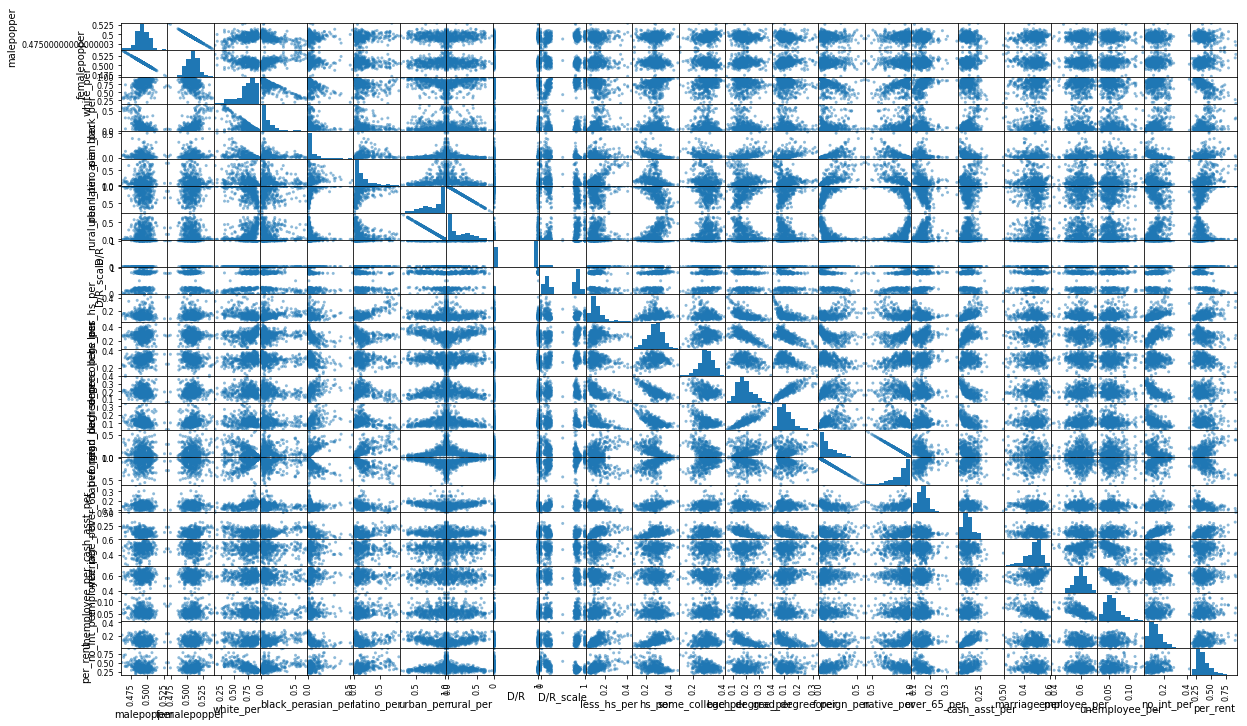

In [1532]:
pd.plotting.scatter_matrix(df_final_drop, figsize=[20,12]);

In [1537]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import statsmodels as stats
import statsmodels.formula.api as smf

In [1556]:
df_final_vars = df_final_drop.drop(['D_R_scale'], axis=1)
#all variables - dropped columns

In [1557]:
df_final_target = df_final_drop['D_R_scale']
#just the target value

In [1558]:
df_final_vars_describe = df_final_vars.describe()
#describe() of all variables - target value

In [1559]:
col_names = df_final_drop.describe().columns.drop(['D_R_scale'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(df_final_vars_describe):
    f = 'D_R_scale~' + val
    model = smf.ols(formula=f, data=df_final_drop).fit()
    X_new = pd.DataFrame({val: [df_final_drop[val].min(), df_final_drop[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

['malepopper', 0.08302107289772609, -4.81347229332777, 10.852345045608425, 9.209729553531191e-10]
['femalepopper', 0.0830210728977262, 6.038872752280681, -10.852345045608473, 9.209729553529882e-10]
['white_per', 0.3276699751037798, -0.35762262715438714, 1.2059166006690862, 3.12834500395561e-39]
['black_per', 0.09683695455492614, 0.628731787921636, -0.797206418533891, 3.1984369882694737e-11]
['asian_per', 0.11781509727762507, 0.6251297301364007, -1.856890581345202, 1.796069061964931e-13]
['latino_per', 0.11909697888731541, 0.6473592411178732, -0.6868607812565772, 1.3041662574322919e-13]
['urban_per', 0.3112450930702866, 1.3786283288913266, -1.052707525912171, 5.966517304898349e-37]
['rural_per', 0.31124509307028647, 0.3259208029791558, 1.0527075259121703, 5.96651730489852e-37]
['D_R', 0.9583145001207325, 0.13457083333333333, 0.705844598765432, 6.59786467281709e-301]
['less_hs_per', 0.06114845121730017, 0.7119608624193199, -1.4455119352784171, 1.8092093130729283e-07]
['hs_per', 0.1114118

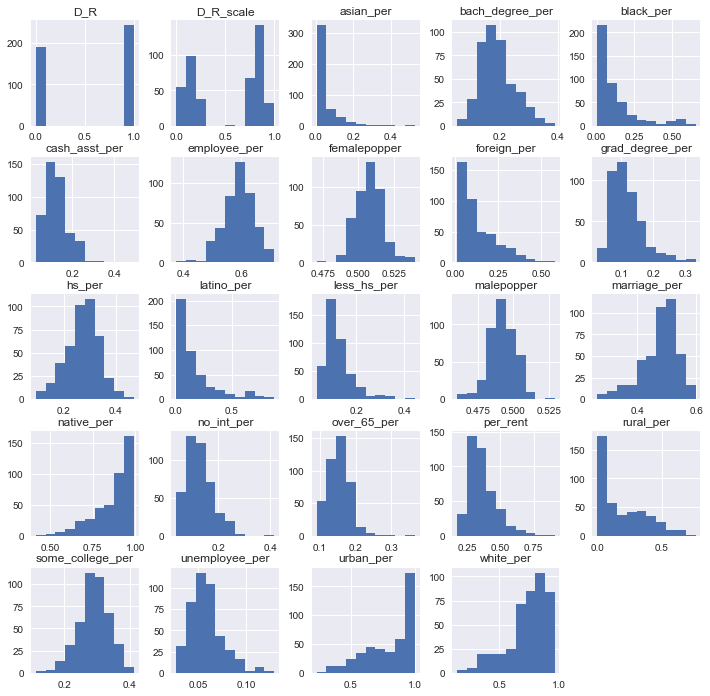

In [1561]:
df_final_drop.hist(figsize=[12,12]);

In [1562]:
np.log(df_final_drop['per_rent']).describe()

count    435.000000
mean      -1.035938
std        0.272839
min       -1.757938
25%       -1.223882
50%       -1.058272
75%       -0.887939
max       -0.091651
Name: per_rent, dtype: float64